#### Jupyter Notebook to compute performance metrics from the segmentation predictions.

#### Imports

In [1]:
import numpy as np
from skimage import io
from scipy.misc import imread, imsave
import os
import imageio
import json
import matplotlib.pyplot as plt
from shutil import copy

from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import *

%matplotlib inline

### Use case: compute axon and myelin validation metrics on a sample image

In [2]:
path_img = '/Users/Documents/Aldo/axondeepseg/AxonDeepSeg/data_test/image.png'

In [3]:
# Set paths
img = imageio.imread(path_img)
path_folder, file_name = os.path.split(path_img)
model_name = 'default_SEM_model_v1'
path_model = os.path.join('..','AxonDeepSeg','models',model_name)
path_configfile = os.path.join(path_model,'config_network.json')
with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())

# Groundtruth image
mask = imageio.imread(os.path.join(path_folder,'mask.png'))
gt_axon = mask[:,:,1] > 200
gt_myelin = np.logical_and(mask[:,:,1] >= 50, mask[:,:,1] <= 200)

# Prediction image (output of AxonDeepSeg)
pred = imageio.imread(os.path.join(path_folder,'AxonDeepSeg.png'))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

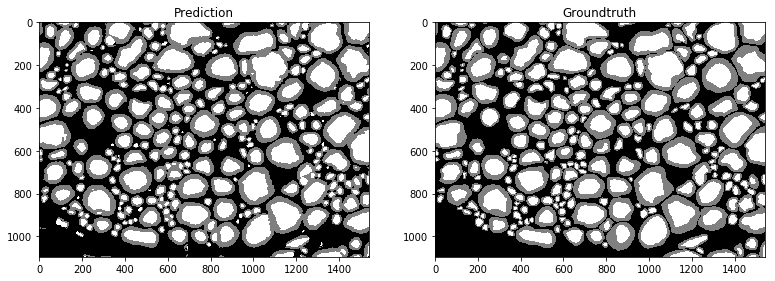

In [4]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Prediction')
plt.imshow(pred,cmap='gray')
plt.subplot(122)
plt.title('Groundtruth')
plt.imshow(mask,cmap='gray')
plt.show();

#### Compute validation metrics for axon segmentation

In [5]:
# Create object to manage segmentation metrics for axon mask
axon_metrics = Metrics_calculator(pred_axon, gt_axon)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', axon_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',axon_metrics.pw_accuracy())
print('Pixelwise Dice:',axon_metrics.pw_dice())
print('Pixelwise F1 score:',axon_metrics.pw_F1_score())
print('Pixelwise False negative rate:',axon_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',axon_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',axon_metrics.pw_jaccard())
print('Pixelwise Precision:',axon_metrics.pw_precision())
print('Pixelwise Specificity:',axon_metrics.pw_specificity())

axon_metrics_array = np.array([axon_metrics.pw_sensitivity(),axon_metrics.pw_specificity(),axon_metrics.pw_precision(),
     axon_metrics.pw_accuracy(), axon_metrics.pw_F1_score(), axon_metrics.pw_dice(), axon_metrics.pw_jaccard()])

# Compute and display results (elementwise metrics):
dice_output = axon_metrics.ew_dice('all')

print('Elementwise Dice:',axon_metrics.ew_dice('short'))

('Pixelwise Sensitivity:', 0.9076187907633985)
('Pixelwise Accuracy:', 0.9537424745520257)
('Pixelwise Dice:', 0.9244337317700223)
('Pixelwise F1 score:', 0.9244337317700222)
('Pixelwise False negative rate:', 0.09238120923660154)
('Pixelwise False positive rate:', 0.025366003052247788)
('Pixelwise Jaccard index:', 0.8901509930222075)
('Pixelwise Precision:', 0.9418834752444024)
('Pixelwise Specificity:', 0.9746339969477522)
('Elementwise Dice:', {'percent_25': 0.8767890002044572, 'max': 0.9815956695693104, 'percent_90': 0.9606106310287573, 'percent_95': 0.9671646465092858, 'std': 0.08946780134447999, 'percent_5': 0.7528716212659238, 'min': 0.03177257525083612, 'percent_50': 0.9047224523612262, 'percent_75': 0.9411210683105606, 'percent_10': 0.8297145272467161, 'mean': 0.8924894743988269})


#### Compute validation metrics for myelin segmentation

In [6]:
# Create object to manage segmentation metrics for myelin mask
myelin_metrics = Metrics_calculator(pred_myelin, gt_myelin)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', myelin_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',myelin_metrics.pw_accuracy())
print('Pixelwise Dice:',myelin_metrics.pw_dice())
print('Pixelwise F1 score:',myelin_metrics.pw_F1_score())
print('Pixelwise False negative rate:',myelin_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',myelin_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',myelin_metrics.pw_jaccard())
print('Pixelwise Precision:',myelin_metrics.pw_precision())
print('Pixelwise Specificity:',myelin_metrics.pw_specificity())

myelin_metrics_array = np.array([myelin_metrics.pw_sensitivity(),myelin_metrics.pw_specificity(),myelin_metrics.pw_precision(),
                        myelin_metrics.pw_accuracy(), myelin_metrics.pw_F1_score(), myelin_metrics.pw_dice(), 
                        myelin_metrics.pw_jaccard()])

('Pixelwise Sensitivity:', 0.8394451437143301)
('Pixelwise Accuracy:', 0.8892687467139074)
('Pixelwise Dice:', 0.8388781484659574)
('Pixelwise F1 score:', 0.8388781484659577)
('Pixelwise False negative rate:', 0.1605548562856699)
('Pixelwise False positive rate:', 0.08467437234324582)
('Pixelwise Jaccard index:', 0.7216325381120721)
('Pixelwise Precision:', 0.8383119186436943)
('Pixelwise Specificity:', 0.9153256276567542)


#### Visualization of pixelwise metrics for both axon and myelin

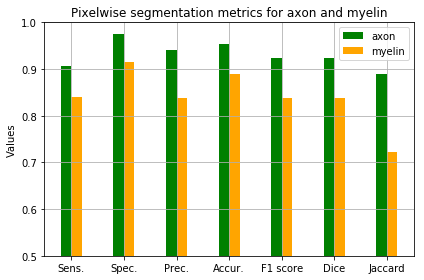

In [7]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)

rects1 = plt.bar(index-0.1, axon_metrics_array, width=0.2, color='green',label='axon')
rects2 = plt.bar(index+0.1, myelin_metrics_array, width=0.2, color='orange',label='myelin')

plt.ylabel('Values')
plt.title('Pixelwise segmentation metrics for axon and myelin')
plt.xticks(index, ('Sens.', 'Spec.', 'Prec.', 'Accur.', 'F1 score','Dice','Jaccard'),fontsize=10)
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()

#### Visualization of elementwise Dice metric for axon objects

[]

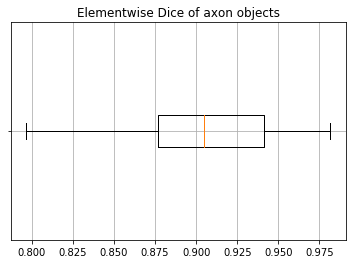

In [8]:
plt.figure()
plt.boxplot(dice_output, 0, '',vert=False)
plt.title('Elementwise Dice of axon objects')
plt.grid(True)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
